# Using Full Output for Diagnostics 

Sometimes it helps to have a bigger picture of what the full output is doing. 

These steps will guide you through how to get out gain more intuition from your runs. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import astropy.units as u
#picaso
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

#plotting
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import show

Loading BokehJS ...

We will use a cloudy Jupiter again to guide us through the exercise.

In [2]:
opa = jdi.opannection() 

case1 = jdi.inputs()

case1.phase_angle(0)

case1.gravity(gravity=25, gravity_unit=u.Unit('m/(s**2)'))

case1.star(opa, 6000,0.0122,4.437)

#atmo
case1.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace=True)
case1.clouds(filename = jdi.jupiter_cld(), delim_whitespace=True)

## Return ``PICASO`` Full Ouput

In [3]:
df = case1.spectrum(opa, full_output=True) #note the new last key 
wno, alb, full_output = df['wavenumber'] , df['albedo'] , df['full_output'] 

## Visualizing Full Output 

### Mixing Ratios

In [4]:
show(jpi.mixing_ratio(full_output))
#can also input any key word argument acceptable for bokeh.figure: 
#show(jpi.mixing_ratio(full_output, plot_width=500, y_axis_type='linear',y_range=[10,1e-3])) 

### Cloud Profile

Depending on your wavelength grid, you might exceed ``Jupyter Notebook's`` data rage limit. You can fix this by initiating jupyter notebook with a higher data rate limit. 

``jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000``

In [5]:
show(jpi.cloud(full_output))

### Pressure-Tempertaure Profile

In [6]:
show(jpi.pt(full_output))

### Photon Attenuation Depth

This is a useful plot to see the interplay between scattering and absorbing sources. It should explain why you are getting bright versus dark reflectivity

In [7]:
show(jpi.photon_attenuation(full_output, at_tau=0.1, plot_width=500))

Compare it to the spectrum and you can see right away what is driving the overall shape of your spectrum

In [8]:
show(jpi.spectrum(wno,alb,plot_width=500))

### 3D Plotting

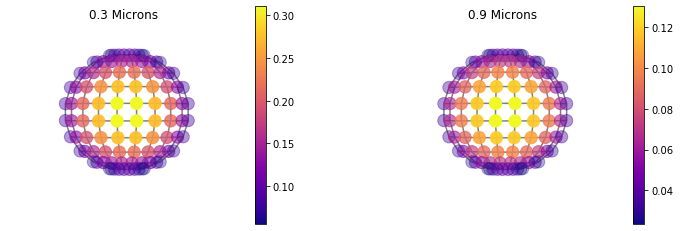

In [9]:
jpi.disco(full_output,wavelength=[0.3,0.9])

### Disecting Full Output 

In [10]:
full_output.keys()

dict_keys(['weights', 'layer', 'wavenumber', 'wavenumber_unit', 'taugas', 'tauray', 'taucld', 'level', 'latitude', 'longitude', 'reflected'])

In [11]:
full_output['layer'].keys()

dict_keys(['pressure_unit', 'mixingratio_unit', 'temperature_unit', 'pressure', 'mixingratios', 'temperature', 'cloud'])

In [12]:
taugas = full_output['taugas'] #matrix that is nlevel x nwvno
taucld = full_output['taucld'] #matrix that is nlevel x nwvno
taugas = full_output['taugas'] #matrix that is nlevel x nwvno